In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# loading the dataset
df = pd.read_csv("Telecom Data.csv")
df.head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
# Cleaning the data
df = df.drop("CustomerID", axis = 1)

In [ ]:
df = df.drop("ServiceArea", axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

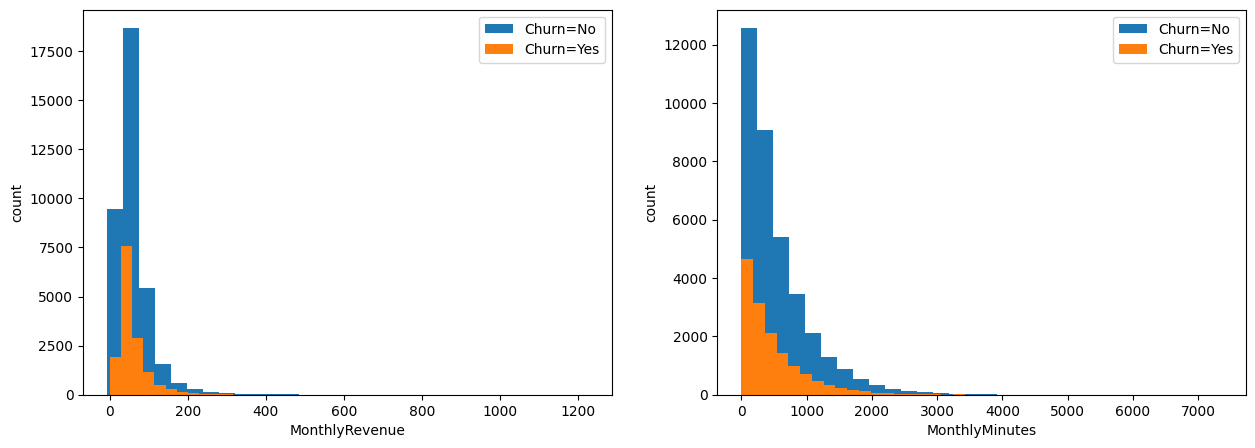

In [ ]:
# Include the columns which gives the continuous values
# creating list

# Select continuous variables
cvars = ['MonthlyRevenue', 'MonthlyMinutes']

# Create subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot histograms for each continuous variable
for i, x in enumerate(cvars):
    ax[i].hist(df[x][df.Churn == 'No'], label='Churn=No', bins=30)
    ax[i].hist(df[x][df.Churn == 'Yes'], label='Churn=Yes', bins=30)
    ax[i].set(xlabel=x, ylabel='count')
    ax[i].legend()

In [ ]:
# Identify the number categorical variables
categorical_vars = [col for col in df.columns if df[col].dtype == 'object']
num_categorical_vars = len(categorical_vars)
print("Number of categorical variables:", num_categorical_vars)

Number of categorical variables: 22


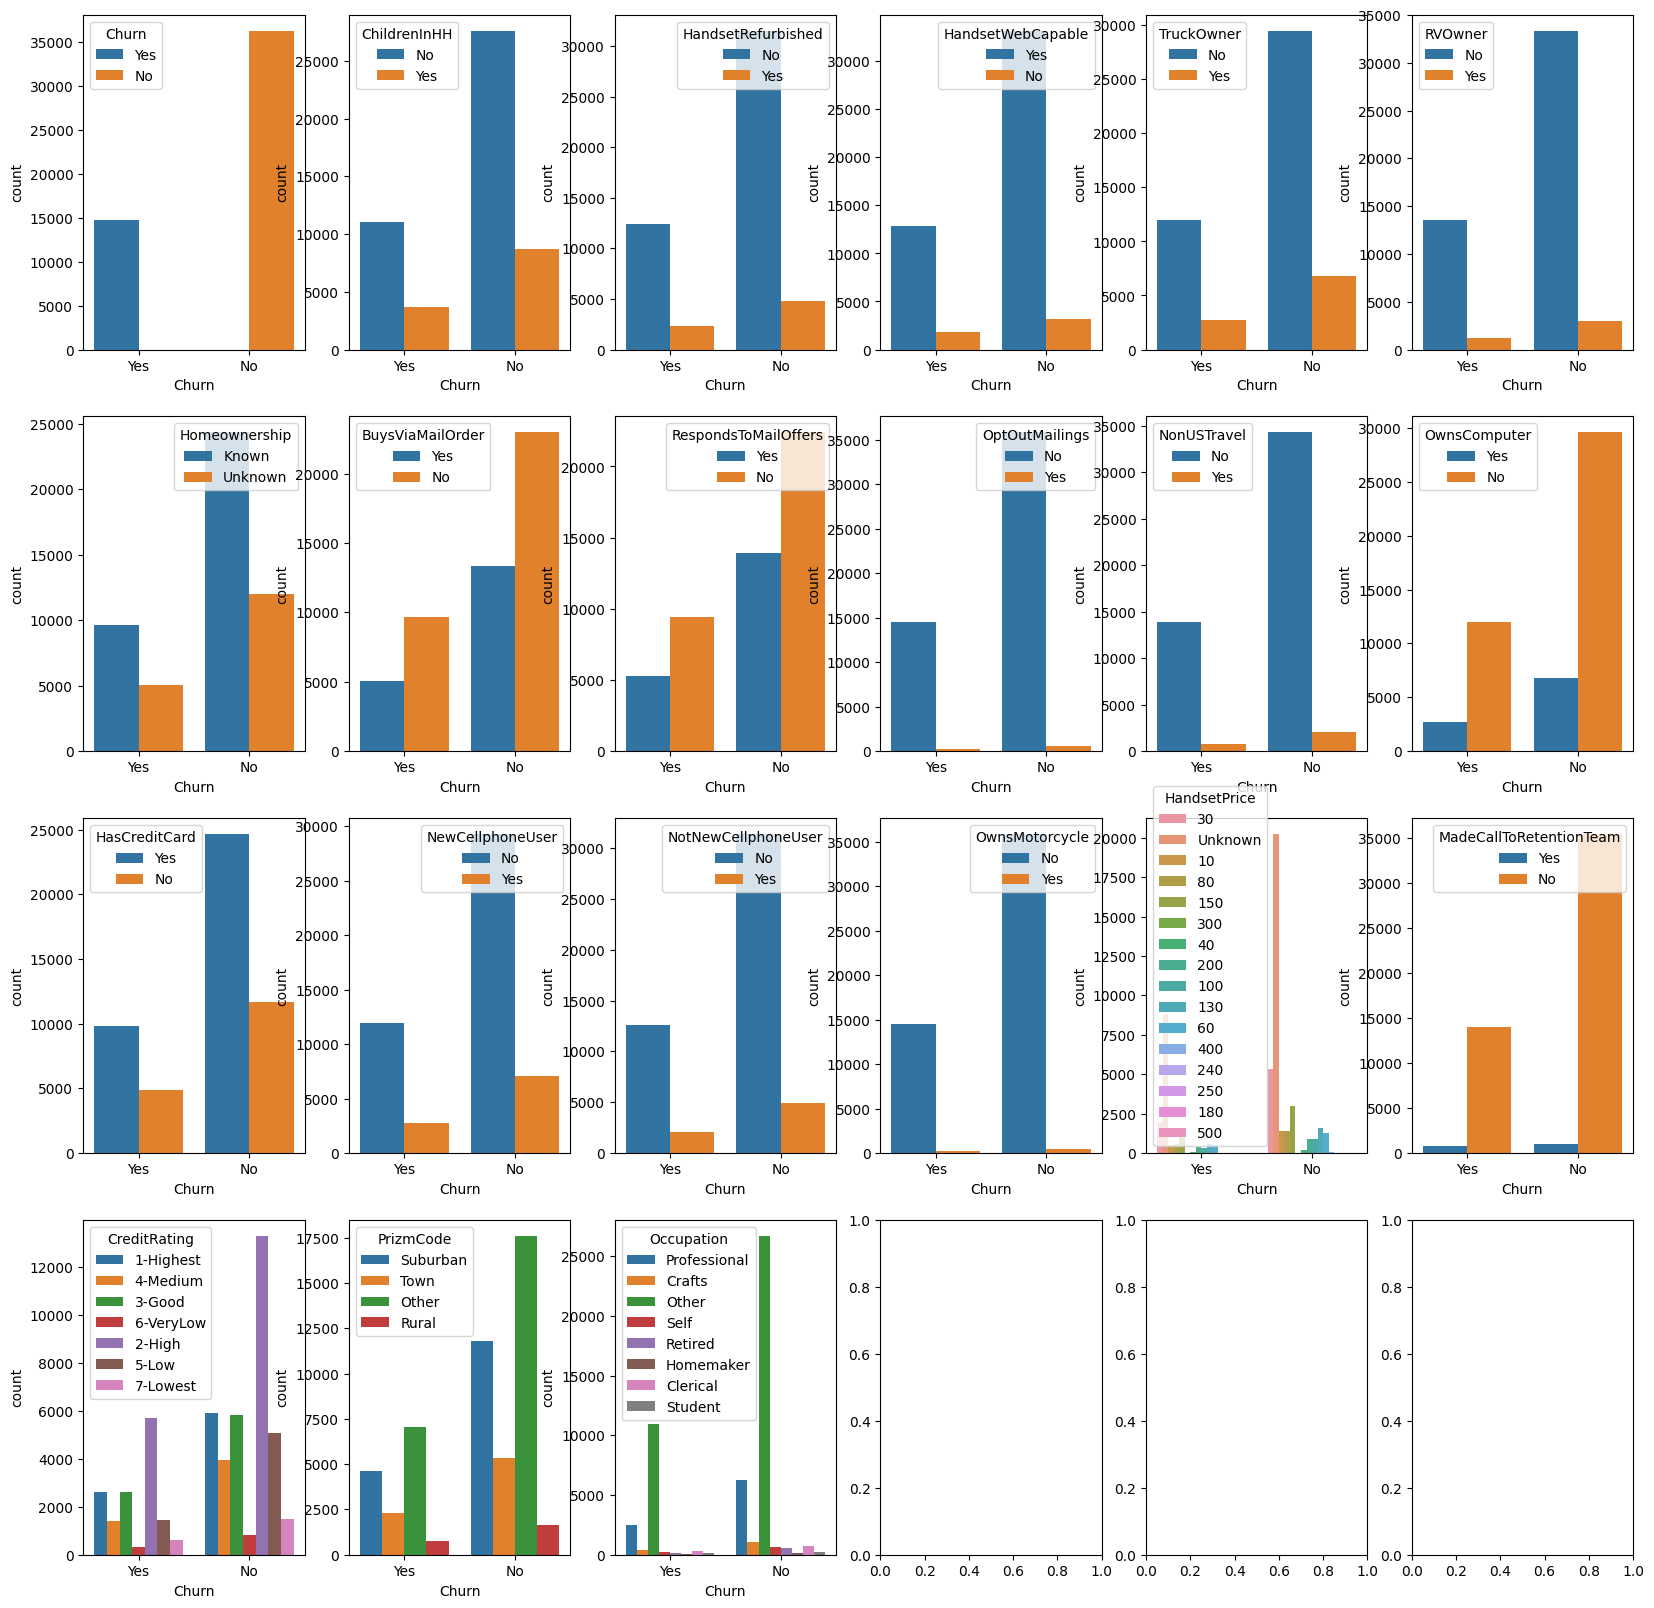

In [ ]:
# Identify categorical variables
categorical_vars = [i for i in df.columns if df[i].dtypes == 'object']
catVars_noChurn = categorical_vars[:-1]

# Create subplots for count plots
num_rows = 4
num_cols = 6  # Adjust based on the number of categorical variables
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Plot count plots for each categorical variable
for axi, var in zip(ax.flat, catVars_noChurn):
    sns.countplot(x=df.Churn, hue=df[var], ax=axi)

In [ ]:
# Encoding the data
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
  print(x,df[x].unique())
  df[x] = le.fit_transform(df[x])

Churn ['Yes' 'No']
ChildrenInHH ['No' 'Yes']
HandsetRefurbished ['No' 'Yes']
HandsetWebCapable ['Yes' 'No']
TruckOwner ['No' 'Yes']
RVOwner ['No' 'Yes']
Homeownership ['Known' 'Unknown']
BuysViaMailOrder ['Yes' 'No']
RespondsToMailOffers ['Yes' 'No']
OptOutMailings ['No' 'Yes']
NonUSTravel ['No' 'Yes']
OwnsComputer ['Yes' 'No']
HasCreditCard ['Yes' 'No']
NewCellphoneUser ['No' 'Yes']
NotNewCellphoneUser ['No' 'Yes']
OwnsMotorcycle ['No' 'Yes']
MadeCallToRetentionTeam ['Yes' 'No']


In [ ]:
df = pd.get_dummies(df, columns = [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [ ]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,0,1,0,0,0,0,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,0,0,1,0,0,0,0,1
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,1,0,0,0,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# find the value of k
# Elbow Method
x = df.iloc[:, :57].values #location for all records with columns

In [ ]:
# Import kmeans algorithm
from sklearn.cluster import KMeans
wcss = [] #within cluster square of sum also k/as inertia

In [ ]:
# Replace column_names with your actual column names
column_names = ['column{}'.format(i) for i in range(1, 58)]

# Convert x to a DataFrame
x_df = pd.DataFrame(x, columns=column_names)

# Check for missing values
missing_values = x_df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

column1       0
column2     156
column3     156
column4     156
column5     156
column6     156
column7     156
column8     367
column9     367
column10      0
column11      0
column12      0
column13      0
column14      0
column15      0
column16      0
column17      0
column18      0
column19      0
column20      0
column21      0
column22      0
column23      0
column24      0
column25      0
column26      1
column27      1
column28      1
column29    909
column30    909
column31      0
column32      0
column33      0
column34      0
column35      0
column36      0
column37      0
column38      0
column39      0
column40      0
column41      0
column42      0
column43      0
column44      0
column45      0
column46      0
column47      0
column48      0
column49      0
column50      0
column51      0
column52      0
column53      0
column54      0
column55      0
column56      0
column57      0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent' depending on your data
x = imputer.fit_transform(x)

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x) #training our model using algorithm with the input data
  # used to calculate value for inertias and append it to wcss variable
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

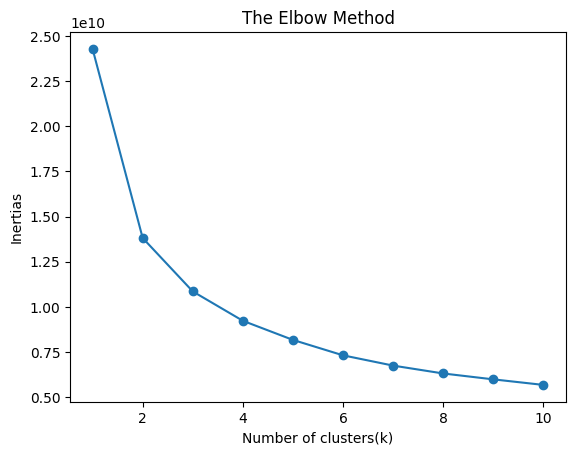

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertias")
plt.show()

In [ ]:
# K =3, we can form 3 clusters from given dataset as elbow point is 3
kmeans = KMeans(n_clusters = 3)
# train the model on input data
kmeans_model = kmeans.fit(x)
y_kmeans = kmeans_model.predict(x)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

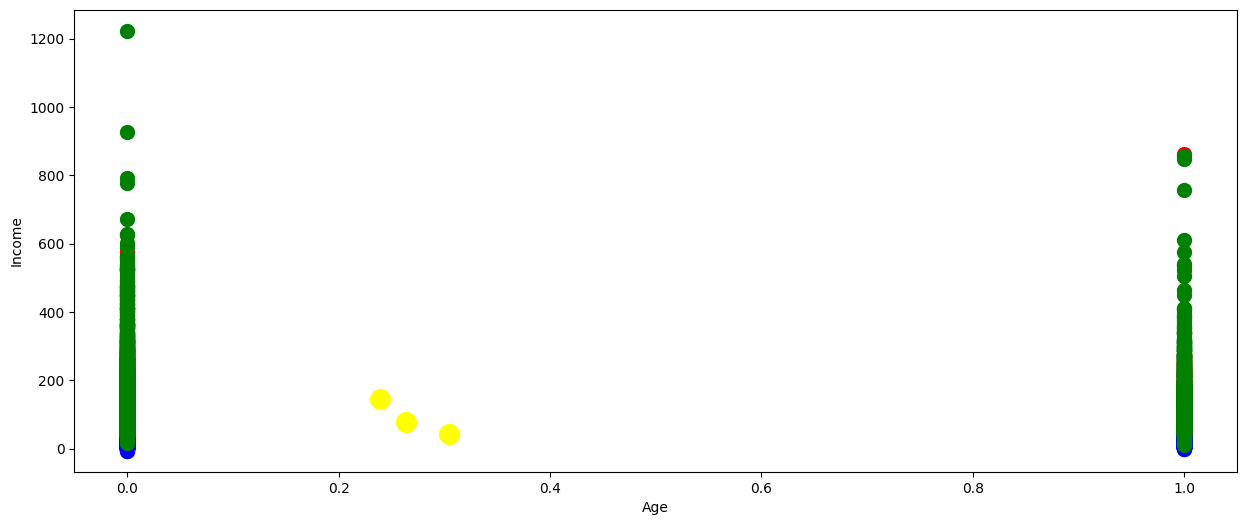

In [ ]:
# Visualization
# 2D plots on any 2 columns
plt.figure(figsize = (15,6))

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
            s=100,c='red',label='Cluster 0')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
            s=100,c='blue',label='Cluster 1')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
            s=100,c='green',label='Cluster 2')

# Clusters Centroids
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],
s=200,c='yellow',label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()